In [1]:
STUDENTDATAFILE = 'creditos_banco_alumnos.csv'
EVALDATAFILE    = 'creditos_banco_evaluacion.csv'
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(STUDENTDATAFILE, header=0)

In [4]:
df['Default'] = df['Default'].map({'default': 1, 'paid off': 0})

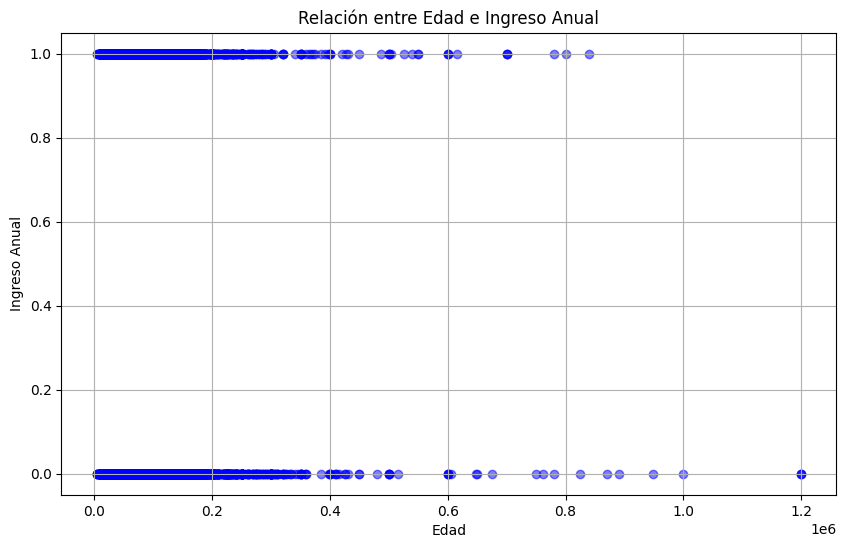

In [11]:
import matplotlib.pyplot as plt

# Supongamos que la predictor es 'Edad' y la target es 'IngresoAnuales'
plt.figure(figsize=(10, 6))
plt.scatter(df['IngresoAnuales'], df['Default'], color='blue', alpha=0.5)

# Personalizar el gráfico
plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.grid(True)
plt.show()

# Duplicados

In [3]:
print("Cantidad:",  df.duplicated().sum())

Cantidad: 0


# Nulos

In [4]:
df.isna().sum()/df.shape[0]*100

Importe                 0.0
añosPago                0.0
IngresoAnuales          0.0
RelacionIngresoDeuda    0.0
RelacionCuotaDeuda      0.0
PendienteEnTarjeta      0.0
UsoCreditoTarjeta       0.0
Objetivo                0.0
esPropietario           0.0
FueVeraz                0.0
TuvoEmbargo             0.0
Cuentas                 0.0
PuntuacionGeneral       0.0
Default                 0.0
AntiguedadLaboral       0.0
dtype: float64

# Columnas y Tipos

# Outliers

In [5]:
df.columns

Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'Objetivo', 'esPropietario', 'FueVeraz', 'TuvoEmbargo', 'Cuentas',
       'PuntuacionGeneral', 'Default', 'AntiguedadLaboral'],
      dtype='object')

In [6]:
df.dtypes

Importe                   int64
añosPago                  int64
IngresoAnuales            int64
RelacionIngresoDeuda    float64
RelacionCuotaDeuda      float64
PendienteEnTarjeta        int64
UsoCreditoTarjeta       float64
Objetivo                 object
esPropietario            object
FueVeraz                  int64
TuvoEmbargo               int64
Cuentas                   int64
PuntuacionGeneral       float64
Default                  object
AntiguedadLaboral         int64
dtype: object

# Categoricos

In [7]:
df["Objetivo"].unique()

array(['Deuda', 'Deuda renovable', 'Mudanza', 'Evento', 'Hipoteca',
       'No declara', 'Inversion', 'Negocio', 'Bien de Capital', 'Compra',
       'Otros', 'Vacaciones'], dtype=object)

In [8]:
df["esPropietario"].unique()

array(['Hipoteca', 'Alquiler', 'Propio', 'Otro'], dtype=object)

In [9]:
df["Default"].unique()

array(['paid off', 'default'], dtype=object)

# Booleanos

In [10]:
df["FueVeraz"].value_counts()

FueVeraz
0    29135
1     4871
Name: count, dtype: int64

In [11]:
df["TuvoEmbargo"].value_counts()

TuvoEmbargo
0    30985
1     3021
Name: count, dtype: int64

# Numericos

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)

df[['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
    'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
    'Cuentas', 'PuntuacionGeneral', 'AntiguedadLaboral']].describe().T


,count,mean,std,min,25%,50%,75%,max
Importe,34006.00,13172.60,8101.33,500.00,7000.00,11500.00,18000.00,35000.00
añosPago,34006.00,3.50,0.87,3.00,3.00,3.00,5.00,5.00
IngresoAnuales,34006.00,68136.86,45495.77,3500.00,42000.00,60000.00,82000.00,1200000.00
RelacionIngresoDeuda,34006.00,16.11,7.59,0.00,10.46,16.01,21.56,38.60
RelacionCuotaDeuda,34006.00,8.03,4.27,0.05,4.66,7.49,10.94,43.55
PendienteEnTarjeta,34006.00,14973.25,21086.54,0.00,5676.50,10807.50,18668.75,1743266.00
UsoCreditoTarjeta,34006.00,56.09,25.44,0.00,38.00,58.50,76.50,119.00
Cuentas,34006.00,10.43,4.73,0.00,7.00,10.00,13.00,76.00
PuntuacionGeneral,34006.00,4.59,1.49,0.20,3.60,4.80,5.80,7.00
AntiguedadLaboral,34006.00,6.31,3.75,0.00,3.00,6.00,11.00,11.00


A normalizar:
IngresoAnuales 3.500,00  -  1.200.000,00

In [13]:
pd.reset_option('display.float_format')

# Outliers

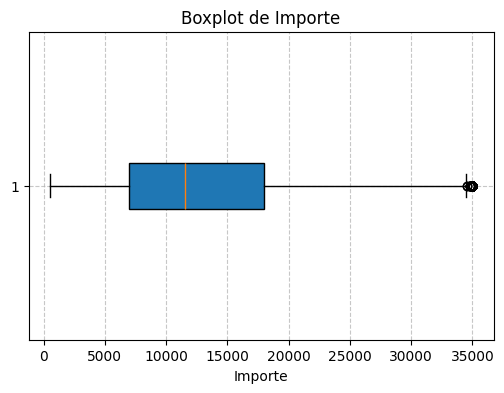

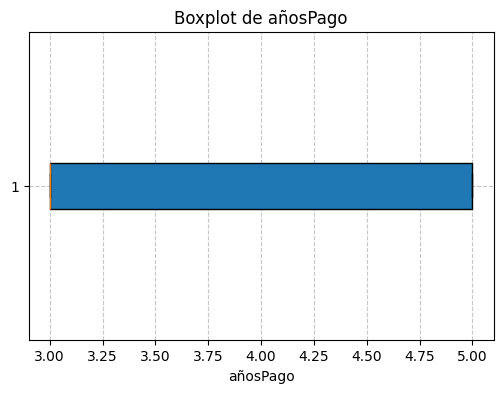

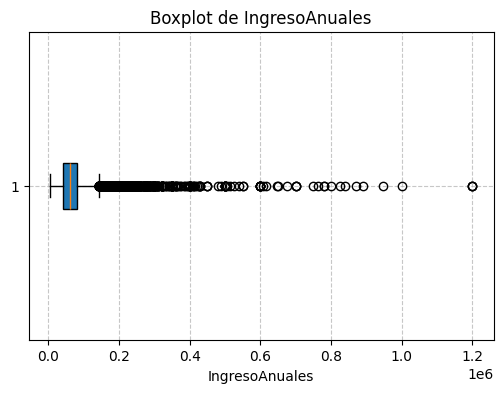

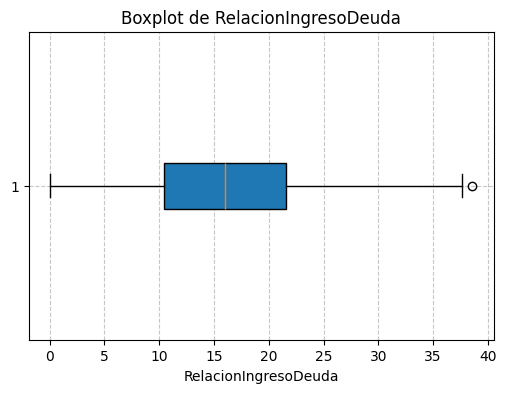

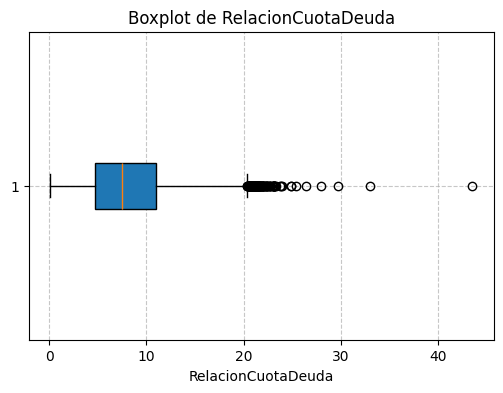

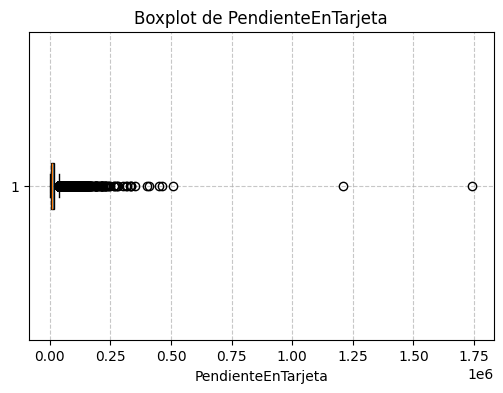

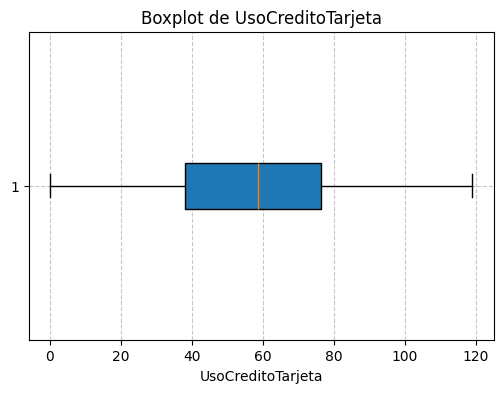

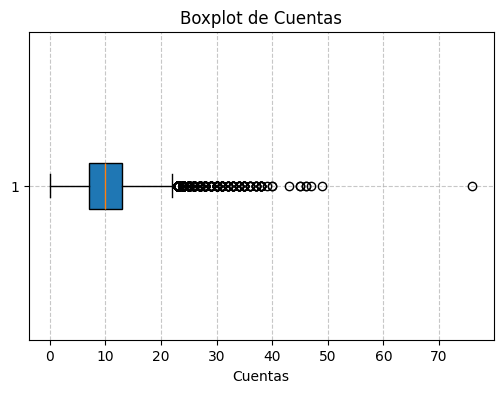

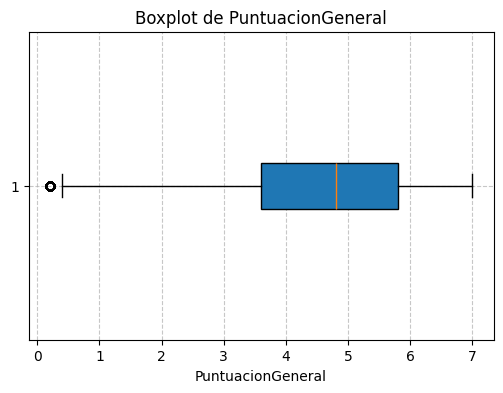

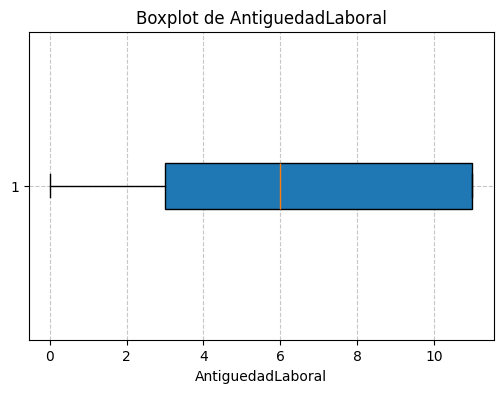

In [14]:
# Lista de columnas
columnas = ['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
            'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
            'Cuentas', 'PuntuacionGeneral', 'AntiguedadLaboral']

# Asegúrate de tener datos en tu DataFrame `df`
# df = pd.read_csv("tu_archivo.csv")  # Ejemplo: cargar datos

# Crear un boxplot para cada columna
for columna in columnas:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[columna].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot de {columna}")
    plt.xlabel(columna)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


# Correlacion

In [15]:
# Reemplazar valores categóricos con números
df['Default'] = df['Default'].map({'default': 1, 'paid off': 0})

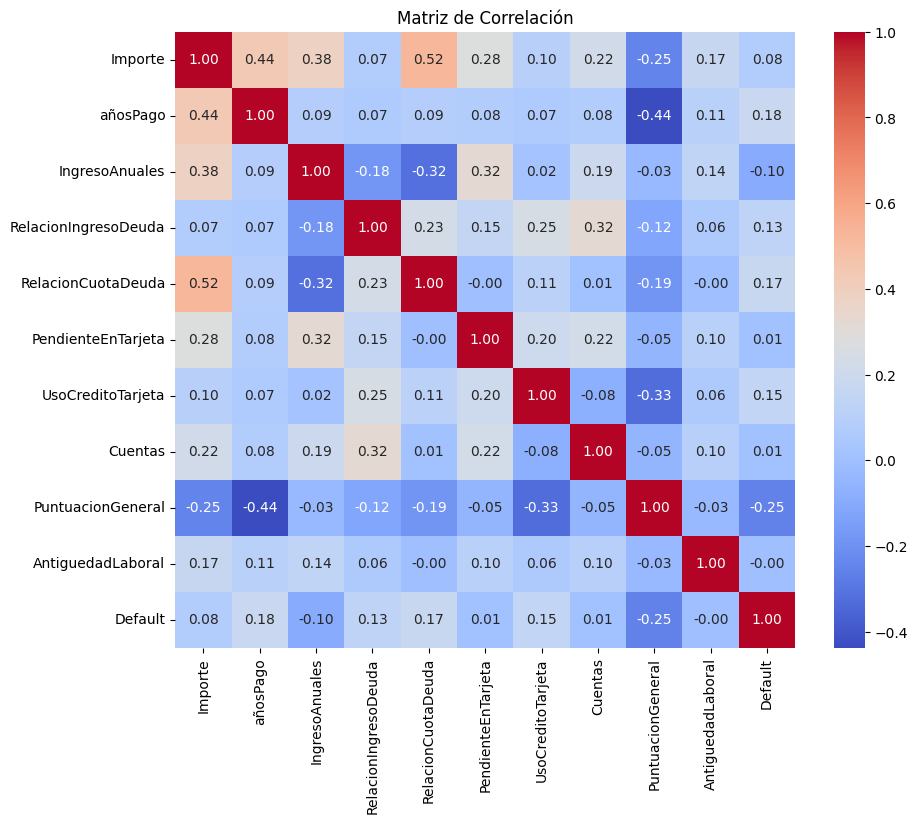

In [16]:
columnas = ['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
            'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
            'Cuentas', 'PuntuacionGeneral', 'AntiguedadLaboral', 'Default']

correlation_matrix = df[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [17]:
min_val = df['IngresoAnuales'].min()
max_val = df['IngresoAnuales'].max()

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")

Valor mínimo: 3500
Valor máximo: 1200000


Cantidad de registros por bin:
IngresoAnuales_bin
(2303.5, 242800.0]       33743
(242800.0, 482100.0]       220
(482100.0, 721400.0]        29
(721400.0, 960700.0]        10
(960700.0, 1200000.0]        4
Name: count, dtype: int64


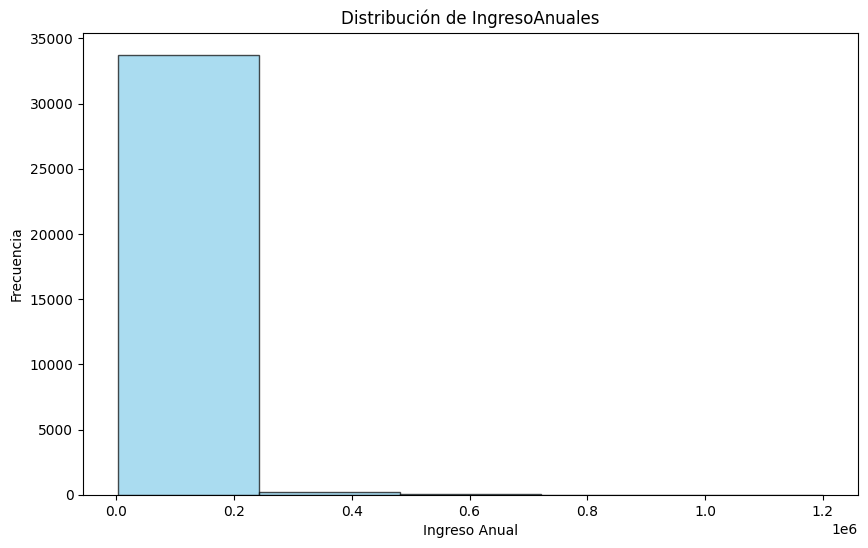

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

bins = 5
df['IngresoAnuales_bin'] = pd.cut(df['IngresoAnuales'], bins=bins)

bin_counts = df['IngresoAnuales_bin'].value_counts().sort_index()

print("Cantidad de registros por bin:")
print(bin_counts)

plt.figure(figsize=(10, 6))
plt.hist(df['IngresoAnuales'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribución de IngresoAnuales')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')

plt.show()


Cantidad de registros por bin en valores bajos:
IngresoAnuales_bin
(3253.5, 52800.0]       14253
(52800.0, 102100.0]     15325
(102100.0, 151400.0]     3270
(151400.0, 200700.0]      721
(200700.0, 250000.0]      237
Name: count, dtype: int64


C:\Users\pc-vic\AppData\Local\Temp\ipykernel_12512\834745176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['IngresoAnuales_bin'] = pd.cut(df_low['IngresoAnuales'], bins=bins_low)


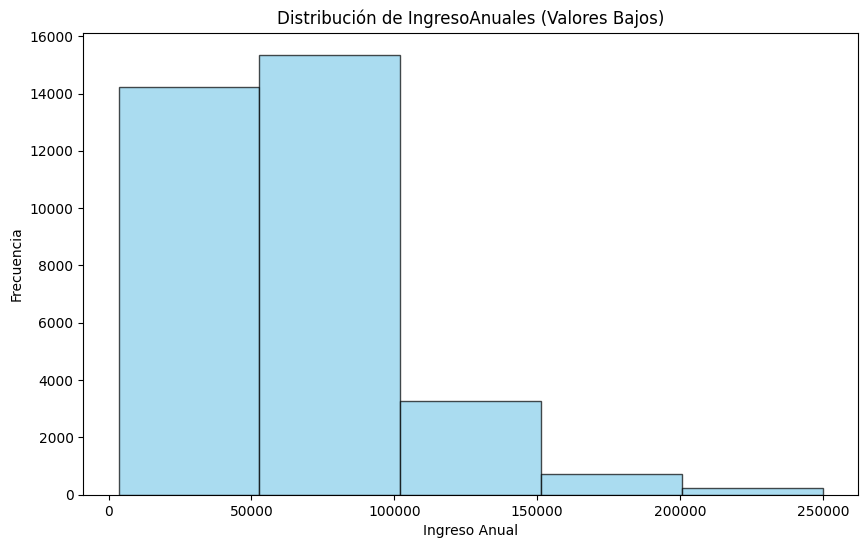

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = 250000

df_low = df[df['IngresoAnuales'] <= threshold]

bins_low = 5
df_low['IngresoAnuales_bin'] = pd.cut(df_low['IngresoAnuales'], bins=bins_low)

bin_counts_low = df_low['IngresoAnuales_bin'].value_counts().sort_index()

print("Cantidad de registros por bin en valores bajos:")
print(bin_counts_low)

plt.figure(figsize=(10, 6))
plt.hist(df_low['IngresoAnuales'], bins=bins_low, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de IngresoAnuales (Valores Bajos)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')
plt.show()


Cantidad de registros por bin (valores bajos):
IngresoAnuales_bin
Bin1    13275
Bin2    16155
Bin3     3410
Bin4      726
Bin5      240
Name: count, dtype: int64


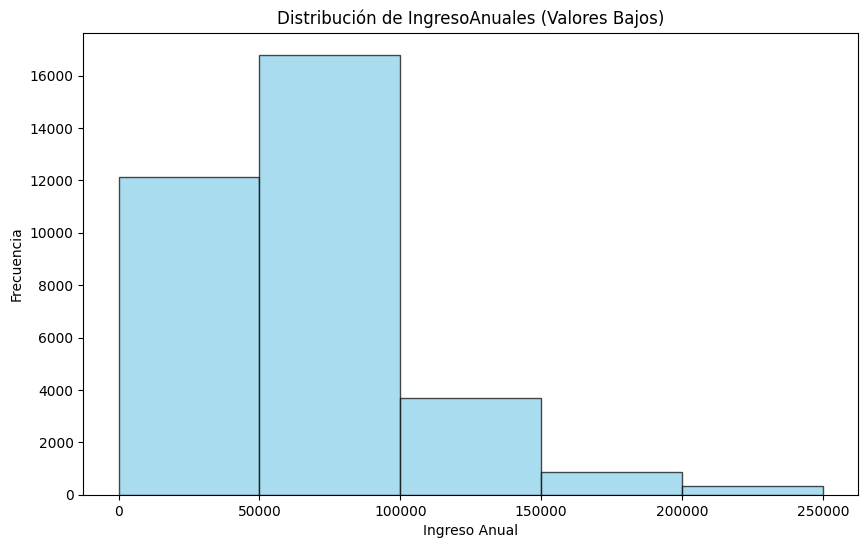

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = 250000

df_low = df[df['IngresoAnuales'] <= threshold]

bins_low = [0, 50000, 100000, 150000, 200000, 250000]
labels_low = [f"Bin{i+1}" for i in range(len(bins_low) - 1)]

df['IngresoAnuales_bin'] = pd.cut(df['IngresoAnuales'], bins=bins_low, labels=labels_low, include_lowest=True)

bin_counts_low = df['IngresoAnuales_bin'].value_counts().sort_index()
print("Cantidad de registros por bin (valores bajos):")
print(bin_counts_low)

plt.figure(figsize=(10, 6))
plt.hist(df_low['IngresoAnuales'], bins=bins_low, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de IngresoAnuales (Valores Bajos)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')
plt.show()
